<a href="https://colab.research.google.com/github/Meghnabehara/portfolio-template/blob/main/20eg106122_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [5]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 313s 2s/step - loss: 0.4411 - accuracy: 0.7835
Epoch 2/5
196/196 [==============================] - 331s 2s/step - loss: 0.2582 - accuracy: 0.8972
Epoch 3/5
196/196 [==============================] - 302s 2s/step - loss: 0.2106 - accuracy: 0.9189
Epoch 4/5
196/196 [==============================] - 301s 2s/step - loss: 0.1855 - accuracy: 0.9293
Epoch 5/5
196/196 [==============================] - 299s 2s/step - loss: 0.1368 - accuracy: 0.9506


In [7]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 95s 484ms/step - loss: 0.3305 - accuracy: 0.8698
accuracy: 0.8697599768638611
loss: 0.3305407166481018


In [8]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 303s 2s/step - loss: 0.1194 - accuracy: 0.9578
Epoch 2/5
196/196 [==============================] - 304s 2s/step - loss: 0.0912 - accuracy: 0.9695
Epoch 3/5
196/196 [==============================] - 305s 2s/step - loss: 0.0729 - accuracy: 0.9754
Epoch 4/5
196/196 [==============================] - 307s 2s/step - loss: 0.0632 - accuracy: 0.9797
Epoch 5/5
196/196 [==============================] - 300s 2s/step - loss: 0.0495 - accuracy: 0.9839


In [9]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

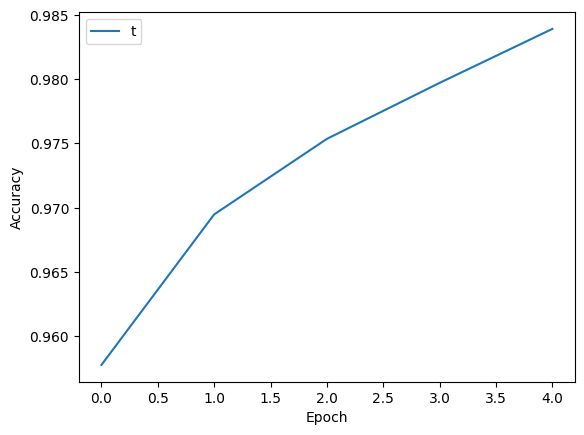

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

#LSTM

In [11]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [12]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 2
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/2
196/196 [==============================] - 376s 2s/step - loss: 0.4803 - accuracy: 0.7596
Epoch 2/2
196/196 [==============================] - 369s 2s/step - loss: 0.3383 - accuracy: 0.8554


In [15]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 132s 670ms/step - loss: 0.3210 - accuracy: 0.8734
accuracy: 0.8733999729156494
loss: 0.3210059702396393


In [16]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

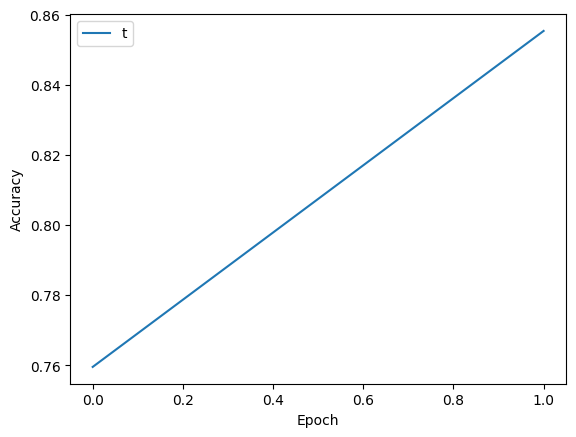

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

#RNN

In [18]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers


In [19]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
epochs = 1
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

157/157 [==============================] - 347s 2s/step - loss: 0.5064 - accuracy: 0.7524 - val_loss: 0.3546 - val_accuracy: 0.8460


In [22]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 135s 688ms/step - loss: 0.3534 - accuracy: 0.8470
accuracy: 0.8469600081443787
loss: 0.3534412980079651


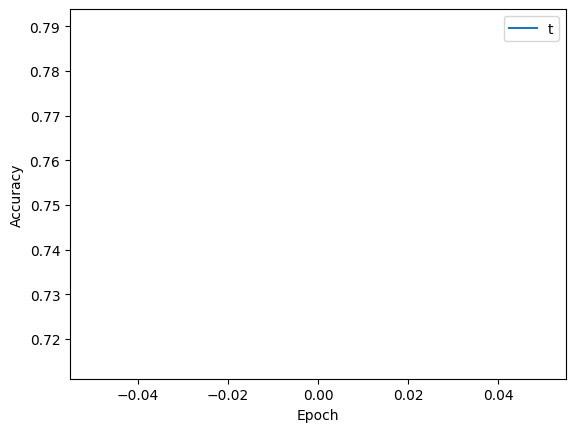

In [23]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

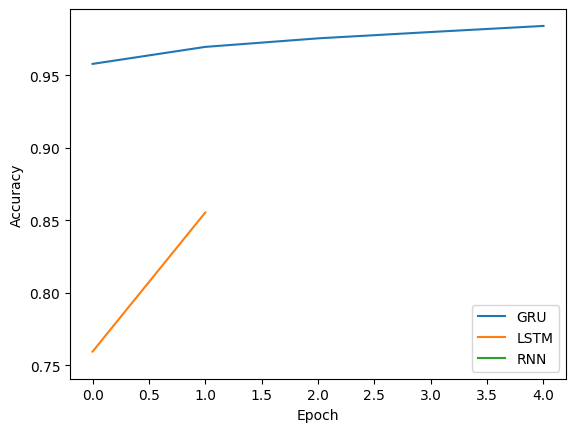

In [24]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])